The aim of the project is to analyze the data of unsuccessful students

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Load the dataset

In [3]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Analyze unique values in the first five columns

In [8]:
for column in df.columns[:5]:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' number of unique values ​​in column: {unique_count}")
    print(f"Unique values: {unique_values}\n")

'gender' number of unique values ​​in column: 2
Unique values: ['female' 'male']

'race/ethnicity' number of unique values ​​in column: 5
Unique values: ['group B' 'group C' 'group A' 'group D' 'group E']

'parental level of education' number of unique values ​​in column: 6
Unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

'lunch' number of unique values ​​in column: 2
Unique values: ['standard' 'free/reduced']

'test preparation course' number of unique values ​​in column: 2
Unique values: ['none' 'completed']



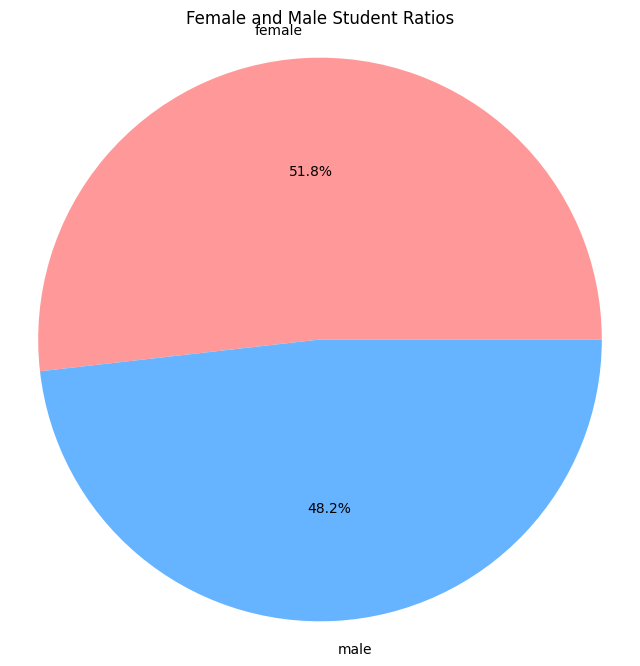

In [9]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Female and Male Student Ratios')
plt.axis('equal')  
plt.show()


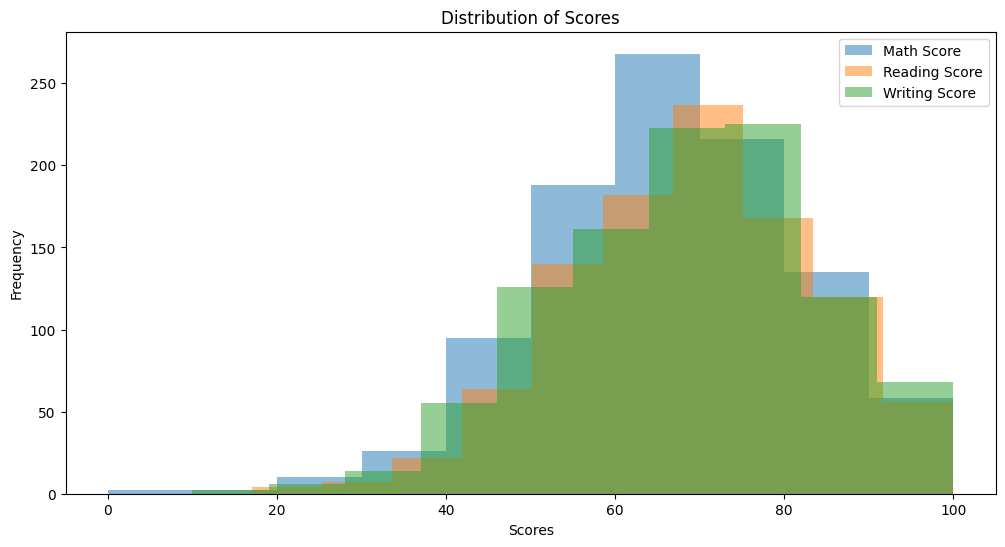

In [10]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['math score'], bins=10, alpha=0.5, label='Math Score')
plt.hist(df['reading score'], bins=10, alpha=0.5, label='Reading Score')
plt.hist(df['writing score'], bins=10, alpha=0.5, label='Writing Score')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend()
plt.show()


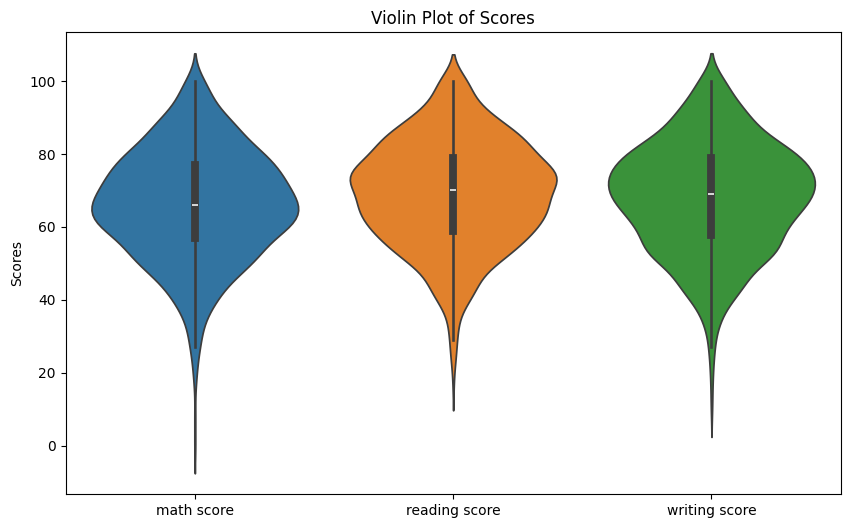

In [11]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Violin Plot of Scores')
plt.ylabel('Scores')
plt.show()

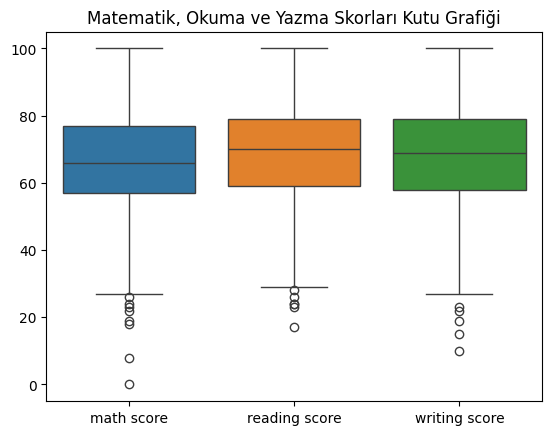

In [12]:
sns.boxplot(data=df[['math score',	'reading score',	'writing score']])
plt.title('Matematik, Okuma ve Yazma Skorları Kutu Grafiği')
plt.show()


## Find Outliers


In [13]:
# Function to find outliers using IQR (Interquartile Range)
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

# Find outliers for each score column
math_outliers = find_outliers(df, 'math score')
reading_outliers = find_outliers(df, 'reading score')
writing_outliers = find_outliers(df, 'writing score')

# Print results
print("Indices of outliers in Math score:", math_outliers.tolist())
print("Indices of outliers in Reading score:", reading_outliers.tolist())
print("Indices of outliers in Writing score:", writing_outliers.tolist())

Indices of outliers in Math score: [17, 59, 145, 338, 466, 787, 842, 980]
Indices of outliers in Reading score: [59, 76, 211, 327, 596, 980]
Indices of outliers in Writing score: [59, 76, 327, 596, 980]


In [14]:
df.iloc[980]

gender                               female
race/ethnicity                      group B
parental level of education     high school
lunch                          free/reduced
test preparation course                none
math score                                8
reading score                            24
writing score                            23
Name: 980, dtype: object

In [15]:
def analyze_outliers(df, outliers, column):
    # Select rows with outliers
    outlier_data = df.loc[outliers]
    
    # Analyze demographic characteristics of outliers
    demographic_analysis = outlier_data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', column]].copy()
    
    return demographic_analysis

# Analyze outliers for Math, Reading, and Writing scores
math_outlier_analysis = analyze_outliers(df, math_outliers, 'math score')
reading_outlier_analysis = analyze_outliers(df, reading_outliers, 'reading score')
writing_outlier_analysis = analyze_outliers(df, writing_outliers, 'writing score')

print("Math Score Outlier Analysis:")
math_outlier_analysis

Math Score Outlier Analysis:


,gender,race/ethnicity,parental level of education,lunch,math score
17,female,group B,some high school,free/reduced,18
59,female,group C,some high school,free/reduced,0
145,female,group C,some college,free/reduced,22
338,female,group B,some high school,free/reduced,24
466,female,group D,associate's degree,free/reduced,26
787,female,group B,some college,standard,19
842,female,group B,high school,free/reduced,23
980,female,group B,high school,free/reduced,8


In [16]:
print("\nReading Score Outlier Analysis:")
reading_outlier_analysis    


Reading Score Outlier Analysis:


,gender,race/ethnicity,parental level of education,lunch,reading score
59,female,group C,some high school,free/reduced,17
76,male,group E,some high school,standard,26
211,male,group C,some college,free/reduced,28
327,male,group A,some college,free/reduced,23
596,male,group B,high school,free/reduced,24
980,female,group B,high school,free/reduced,24


In [17]:
print("\nWriting Score Outlier Analysis:")
writing_outlier_analysis


Writing Score Outlier Analysis:


,gender,race/ethnicity,parental level of education,lunch,writing score
59,female,group C,some high school,free/reduced,10
76,male,group E,some high school,standard,22
327,male,group A,some college,free/reduced,19
596,male,group B,high school,free/reduced,15
980,female,group B,high school,free/reduced,23


Create a new column for average scores

In [18]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)